# Pill 19 WIKI Side Quest: Ensemble

Investigate why ensemble learning works. Focus on one of the models. For example in Bagging it is said that "Bagging performance improvement is due to the reduction of the variace of the classifier while maintaining its bias"

#### by Toni Miranda

This notebook mix notebooks posted by David, Huang, Markos, Indra and Gonzalo, revising different ensemble methods (I have also added Random Subspace Method).

*(Gonzalo) Note: I think Iris data set with 2 features is not the best example to show the advantages of ensemble learning because of  ensemble methods (like Random Forest) improve the performance for large datasets and using a lot of features due to randomization and diversity. However, this way we can see the differences of models, representing the performance in 2D. Anyway, Iris is a toy example, so the result is also good.*

## Why ensemble learning works?
**(David)**

Ensemble learning helps improve machine learning results by combining several models. This approach allows the production of better predictive performance compared to a single model. That is why ensemble methods placed first in many prestigious machine learning competitions, such as the Netflix Competition, KDD 2009, and Kaggle.

Ensemble methods are meta-algorithms that combine several machine learning techniques into one predictive model in order to decrease variance (bagging), bias (boosting), or improve predictions (stacking).

Ensemble methods can be divided into:

- **Bagging (or Bootstrapping aggregation):** Horitzontal aggregation. In bagging different models, obtained by training independent bootstrapped (resampling with replacement) elements, are combined using an aggregation technique (such as majority voting) in order to take the final decision.

- **Boosting:**. Horitzontal aggregation. Each component in the aggregation depends on all the others. In Boosting algorithms each classifier is trained on data, taking into account the previous classifiers' success. After each training step, misclassified data increases its weights to emphasise the most difficult cases. In this way, subsequent learners will focus on them during their training. In this kind of techniques the two most well known approaches for linking members are the notions of residual (gradient boosting, XGBoost) or statistical resampling (adaptive boosting aka AdaBoost). 

- **Stacking:** Vertical aggregation. In this kind of techniques the output of one member of the ensemble is the input for the next member. We can use different model architectures and stack one on the other to improve the final performance.

The basic motivation of parallel methods is to exploit independence between the base learners since the error can be reduced dramatically by averaging.
Most ensemble methods use a single base learning algorithm to produce homogeneous base learners, i.e. learners of the same type, leading to homogeneous ensembles.

There are also some methods that use heterogeneous learners, i.e. learners of different types, leading to heterogeneous ensembles. In order for ensemble methods to be more accurate than any of its individual members, the base learners have to be as accurate as possible and as diverse as possible.

## Why ensemble learning?
**(David)**

To understand that why the generalization ability of an ensemble is usually much stronger than that of a single learner, there are three main reasons:
- The first reason is that, the training data might not provide sufficient information for choosing a single best learner. For example, there may be many learners perform equally well on the training data set. Thus, combining these learners may be a better choice. 
- The second reason is that, the search processes of the learning algorithms might be imperfect.For example, even if there exists a unique best hypothesis, it might be difficult to achieve since running the algorithms result in sub-optimal hypotheses. Thus, ensembles can compensate for such imperfect search processes. 
- The third reason is that, the hypothesis space being searched might not contain the true target function, while ensembles can give some good approximation. For example, it is well-known that the classification boundaries of decision trees are linear segments parallel to coordinate axes. If the target classification boundary is a smooth diagonal line, using a single decision tree cannot lead to a good result yet a good approximation can be achieved by combining a set of decision trees.

# Bagging 

**(David)** 

Bootstrap aggregating, often abbreviated as bagging, is a involves having each model in the ensemble vote with equal weight. In order to promote model variance, bagging trains each model in the ensemble using a randomly drawn subset of the training set. As an example, the random forest algorithm combines random decision trees with bagging to achieve very high classification accuracy.

One way to reduce the variance of an estimate is to average together multiple estimates. For example, we can train M different trees on different subsets of the data (chosen randomly with replacement) and compute the ensemble:
$$ f(x) = \frac{1}{M} \sum_{m=1}^{M}f_m(x)$$

Bagging uses bootstrap sampling to obtain the data subsets for training the base learners. For aggregating the outputs of base learners, bagging uses voting for classification and averaging for regression.

![alt text](algo_bagging.png)
<p style="text-align: center;">Figure 1. Bagging Algorithm .</p>

### Python code

**(Huang)**

We can study bagging in the context of classification on the Iris dataset. We can choose two base estimators: a decision tree and a k-NN classifier. Figure 1 shows the learned decision boundary of the base estimators as well as their bagging ensembles applied to the Iris dataset.

The following code shows the accuracy of using a single estimator of Decision Tree and KNN, it also prints the accuracy of using Bagging classfier based on 10 estimators of Decision Tree and KNN with 0.8 subsampling of training data and 0.8 subsampling of features. Such length of estimators(10), subsamples size(0.8) and subsamples featrues(0.8) are followed by the previously David's work. Also, by default in the Sklearn tutorial page the lenght of estimator is 10 as well. More details, it can be found by [Sscikit-learn Bagging Classifier tutorial page](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 1:3]  # we only take the first two features.
y = iris.target

#Single estimator Decision Tree 
clf_tree = tree.DecisionTreeClassifier(random_state=0)
clf_tree.fit(X, y)
scores_tree = cross_val_score(clf_tree, X, y)
print("The accuracy of using Desicion Tree is:",scores_tree.mean())

#Single estimator KNeighbors(KNN)
clf_KNN= KNeighborsClassifier()
clf_KNN.fit(X, y)
scores_KNN = cross_val_score(clf_KNN, X, y)
print("The accuracy of using KNN is:",scores_KNN.mean())

# DecisionTreeClassifier 15 estimators
clf_bagging_tree = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(random_state=0),n_estimators=15, random_state=0)
clf_bagging_tree.fit(X,y)
scores_bagging_tree = cross_val_score(clf_bagging_tree, X, y)
print("The accuracy of using Bagging technique based on Desicion Tree is:",scores_bagging_tree.mean())

# KNeighborsClassifier 15 estimators
clf_bagging_KNN = BaggingClassifier(KNeighborsClassifier(), n_estimators=15, random_state=0)
clf_bagging_KNN.fit(X,y)
scores_bagging_KNN = cross_val_score(clf_bagging_KNN, X, y)
print("The accuracy of using Bagging technique based on KNN is:",scores_bagging_KNN.mean())

The accuracy of using Desicion Tree is: 0.879901960784
The accuracy of using KNN is: 0.953839869281
The accuracy of using Bagging technique based on Desicion Tree is: 0.940767973856
The accuracy of using Bagging technique based on KNN is: 0.960375816993


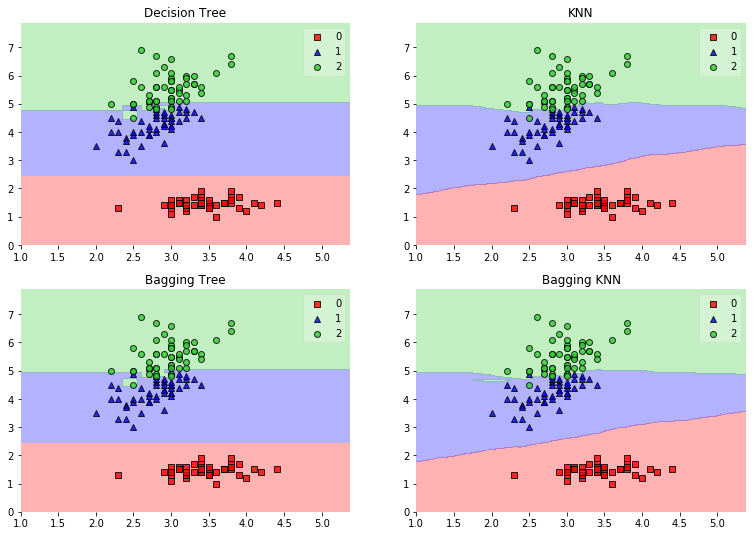

In [2]:
%matplotlib inline
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(13,9))

for clf, lab, grd in zip([clf_tree, clf_KNN, clf_bagging_tree, clf_bagging_KNN], 
                         ['Decision Tree', 
                          'KNN', 
                          'Bagging Tree',
                          'Bagging KNN'],
                          itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(lab)

### Random Forest

**(David)**

In random forests, each tree in the ensemble is built from a sample drawn with replacement (i.e. a bootstrap sample) from the training set. In addition, instead of using all the features, a random subset of features is selected, further randomizing the tree.

As a result, the bias of the forest increases slightly, but due to the averaging of less correlated trees, its variance decreases, resulting in an overall better model.


![alt text](algo_random_forest.png )
<p style="text-align: center;">Figure 3. Random Forest Algorithm.</p>


![alt text](random_forest.png )
<p style="text-align: center;">Figure 4. Example of classification of one sample by the trees on a random forest with n trees.</p>

In an extremely randomized trees algorithm randomness goes one step further: the splitting thresholds are randomized. Instead of looking for the most discriminative threshold, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. This usually allows reduction of the variance of the model a bit more, at the expense of a slightly greater increase in bias.

In [3]:
from sklearn.ensemble import RandomForestClassifier

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 1:3]  # we only take the first 3 features.
y = iris.target

rf = RandomForestClassifier(random_state=1)
rf.fit(X,y)
scores_rf = cross_val_score(rf, X, y)
print("The accuracy of using Random Forest is:",scores_rf.mean())

The accuracy of using Random Forest is: 0.914215686275


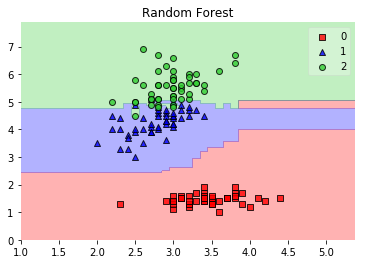

In [4]:
fig = plot_decision_regions(X=X, y=y, clf=rf)
plt.title("Random Forest")

## Stacking

**(Markos)**

Stacking is an ensemble learning technique that combines multiple classification or regression models via a meta-classifier or a meta-regressor. The base level models are trained based on a complete training set, then the meta-model is trained on the outputs of the base level model as features.

The base level often consists of different learning algorithms and therefore stacking ensembles are often heterogeneous. The algorithm below summarizes stacking.

![alt text](algo_stacking.png )
<p style="text-align: center;">Figure 5. Stacking algorithm.</p>

The following example consists of k-NN, Random Forest, and Naive Bayes base classifiers whose predictions are combined by Logistic Regression as a meta-classifier. We can see the blending of decision boundaries achieved by the stacking classifier. The figure also shows that stacking achieves higher accuracy than individual classifiers and based on learning curves, it shows no signs of overfitting.

Finally it is important to mention that stacking is a commonly used technique for winning the Kaggle data science competition.

In [5]:
from sklearn import model_selection
from sklearn import tree
from sklearn import metrics
from sklearn import ensemble
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np
import pandas as pd

from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.91 (+/- 0.01) [KNN]
Accuracy: 0.91 (+/- 0.06) [Random Forest]
Accuracy: 0.92 (+/- 0.03) [Naive Bayes]
Accuracy: 0.95 (+/- 0.03) [StackingClassifier]


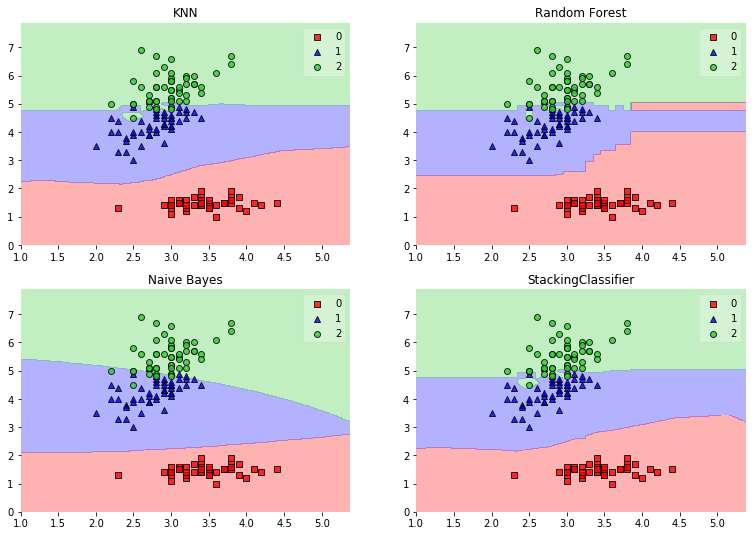

In [6]:
%matplotlib inline
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(13,9))

for clf, lab, grd in zip([clf1, clf2, clf3, sclf], 
                         ['KNN', 
                          'Random Forest', 
                          'Naive Bayes',
                          'StackingClassifier'],
                          itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(lab)

## Boosting

### AdaBoost 

**(Indra)**

Adaboosting is an ensemble method that creates a strong classifier from a number of week classifiers. A week classifier performs poorly, but better than guessing.

The most suited and therefore most common algorithm used with AdaBoost are decision trees with one level. Because these trees are so short and only contain one decision for classification, they are often called decision stumps. But Adaboost can be applied to any classification algorithm.

Adaboost trains several weak classifiers on different random subsets of training data. After each training Adaboost assigns a weight to each traing data point, so that data points with higher weights will have a higher probability of being included in the next training subset. From each training, the examples that were misclassified, are assigned higher weight, so they will have a higher probability of being corrected in the next training. (Before the first training all data points are assigned equal probability.)

![alt text](algo_boosting.png)
<p style="text-align: center;">Figure 6. Adaboost algorithm.</p>

After all the classidiers are trained, they are each given weights based on their accuracies. Classifiers with 50% accuracies are assigned weight zero (because 50% accuracy is the same as guessing), classifiers with higher than 50% accuracies are assigned weights larger than zero, and classifiers with less than 50% accuracies are assigned negative weights (because they predict the opposite of correct). 

$w_0(x_i)=1/N$ - weights before training the first model

Create classifier $h_j(x), i=j,..,K$ from the training subset.

Then compute the output weight for that classifier: $\alpha_j=\frac{1}{2}\ln\big(\frac{1-\epsilon_{j}}{ \epsilon_{j}}\big)$

After computing the classfier weight, we then compute weights for each training data point. 

$
w_j(x_i)=\frac{w_{j-1}(x_i) e^{- y_i \alpha_j h_j(x_i)}}{Z_j}
$

$w_j$ is a vector of weights for each point in the training data set. 

$Z_j=\sum_i w_j(x_i)$ is the sum of all weights, used to normalize the weights so that they sum up to $1$.

$\alpha_j=\frac{1}{2}\ln\big(\frac{1-\epsilon_{j}}{ \epsilon_{j}}\big)$

In [7]:
import numpy as np
from sklearn import model_selection
from sklearn import tree
from sklearn import metrics
from sklearn import ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [8]:
iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

In [9]:
ab = AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0),algorithm="SAMME",n_estimators=200)
ab.fit(X, y)
scores_ab = cross_val_score(clf, X, y)
scores_ab.mean()  

0.94730392156862742

The accuracy of using AdaBoost technique is: 0.947303921569


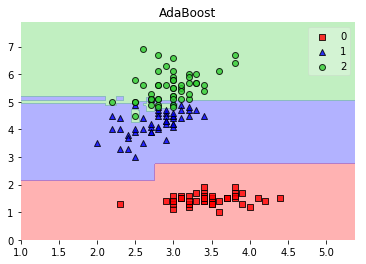

In [10]:
print("The accuracy of using AdaBoost technique is:",scores_ab.mean())
fig = plot_decision_regions(X=X, y=y, clf=ab)
plt.title("AdaBoost")

### Gradient Boosting

**(Gonzalo)**

Gradient Tree Boosting or Gradient Boosted Regression Trees (GBRT) is a generalization of boosting to arbitrary differentiable loss functions. GBRT is an accurate and effective off-the-shelf procedure that can be used for both regression and classification problems.

In Gradient Boosting each model is weighted by the residual of the model trained before. 

*Note: Extreme gradient boosting technique, the famous classifier winner of the majority of competitions) is just a simple random projection followed by a non-linearity and a straight forward least squares optimization.*

![alt text](algo_gradient_boosting.png)
<p style="text-align: center;">Figure 7. Gradient Boosting algorithm.</p>

The accuracy of using Gradient Boosting technique is: 0.90114379085


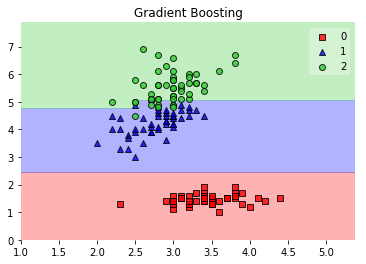

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb.fit(X,y)
scores_gb = cross_val_score(gb, X, y)
print("The accuracy of using Gradient Boosting technique is:",scores_gb.mean())
fig = plot_decision_regions(X=X, y=y, clf=gb)
plt.title("Gradient Boosting")

### Random Subspace Method (RSM)

**(Toni)**

The Random Subspace Method (RSM) [1] randomly selects an arbitrary number of subspace from the original feature space, and build a classifier on each subspace. This randomization should create classifiers that are complementary. The combination can be carried out by simple fixed rules. Experimental evidences showed that RSM works well with feature spaces with large feature sets and redundant features. It avoids the curse of dimensionality. The concepts of RSM can be related to the theory of stochastic discrimination of Kleinberg [2].

![alt text](algo_RSM.png )
<p style="text-align: center;">Figure 8. Random Subspace Method algorithm.</p>

The algorithm projects each feature vector into a less dimensional subspace, by selecting m random components. RSM is similar to Bagging but instead of sampling objects, it performs a kind of feature sampling withouth replacement since it would be useless to include one feature more than once. 

### Random Subspace Method (RSM)

**(Toni)**

The Random Subspace Method (RSM) [1] randomly selects an arbitrary number of subspace from the original feature space, and build a classifier on each subspace. This randomization should create classifiers that are complementary. The combination can be carried out by simple fixed rules. Experimental evidences showed that RSM works well with feature spaces with large feature sets and redundant features. It avoids the curse of dimensionality. The concepts of RSM can be related to the theory of stochastic discrimination of Kleinberg [2].

![alt text](algo_RSM.png )
<p style="text-align: center;">Figure 8. Random Subspace Method algorithm.</p>

The algorithm projects each feature vector into a less dimensional subspace, by selecting m random components. RSM is similar to Bagging but instead of sampling objects, it performs a kind of feature sampling withouth replacement since it would be useless to include one feature more than once. 

#### References:

[1] T. K. Ho, “The random subspace method for constructing decision forests,” IEEE Trans. Pattern Analysis and Machine Intelligence, vol. 20, no. 8, pp. 832–844, 1998.

[2] E. M. Kleinberg, “On the algorithmic implementation of stochastic discrimination,” IEEE Trans. Pattern Analysis and Machine Intelligence, vol. 22, no. 5, pp. 473–490, 2000.

### Bayesian Voting

**(Giuseppe)**

In a Bayesian probabilistic setting, each hypothesis *h* defines a conditional probability distribution: $ h(x) = P (f(x) = y | x, h)$. Given a new data point x and a training sample S, the problem of predicting the value of $f(x)$ can be viewed as the problem of computing $P (f(x)=y | S, x) $.
We can rewrite this as weighted sum over all hypotheses in H: $ P (f(x) = y | S,x) = \sum _{h \in H} {h(x) P(h|S)}$ . 

*"We can view this as an ensemble method in which the ensemble consists of all of
the hypotheses in H each weighted by its posterior probability $ P(h|S) $ ." *[1]


Thanks to this definition, we can implement a bayesian voting as an ensemble technique by using distinct classifiers outputs as hypoteses, then choosing the hypotesys that reaches the highest probability.
I'm going to show an example of it using sklearn VotingClassifier module, that works exactly as my idea, on the iris dataset to continue what already done by my classmates.


** References **

[1] Dietterich, Thomas G. "Ensemble methods in machine learning." Multiple classifier systems 1857 (2000): 1-15.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import cross_val_score

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 1:3]  # we only take the first two features.
y = iris.target

# Decision Tree 
clf_tree = tree.DecisionTreeClassifier(random_state=1)
clf_tree.fit(X, y)
probabDT = clf_tree.predict_proba(X)
scoresDT = cross_val_score(clf_tree, X, y)
print("The accuracy of using NB is:",scoresDT.mean())


# Logistic Regression 
clfLr = LogisticRegression(random_state=1)
clfLr.fit(X, y)
probabLR = clfLr.predict_proba(X)
scoresLr = cross_val_score(clfLr, X, y)
print("The accuracy of using LR is:",scoresLr.mean())


# Naive Bayes 
clfNb = GaussianNB()
clfNb.fit(X, y)
probabNb = clfNb.predict_proba(X)
scoresNb = cross_val_score(clfNb, X, y)
print("The accuracy of using NB is:",scoresNb.mean())

#Hard Voting Classifier
eclf1 = VotingClassifier(estimators=[('dt', clf_tree), ('lr', clfLr), ('nb',clfNb)], voting='hard')
eclf1.fit(X, y)
scores_Vot1 = cross_val_score(eclf1, X, y)
print("The accuracy of using simple voting is:",scores_Vot1.mean())

#Soft Voting Classifier

eclf2 = VotingClassifier(estimators=[('dt', clf_tree), ('lr', clfLr), ('nb',clfNb)], voting='soft')
eclf2.fit(X, y)
scores_Vot2 = cross_val_score(eclf2, X, y,scoring='accuracy')
print("The accuracy of using soft voting is:",scores_Vot2.mean())
    




The accuracy of using NB is: 0.899509803922
The accuracy of using LR is: 0.907679738562
The accuracy of using NB is: 0.920751633987
The accuracy of using simple voting is: 0.940767973856
The accuracy of using soft voting is: 0.912990196078


In [16]:
from sklearn.exceptions import NotFittedError
from sklearn.utils import check_array
from sklearn.base import BaseEstimator

class bayesVoting(BaseEstimator):
    def __init__(self, estimators):
        self.estimators = estimators
        self.isFitted = False
        
    def fit(self, X, y):
        estimators = []
        for estimator in self.estimators:
            estimator.fit(X, y)
            estimators.append(estimator)
        self.isFitted = True
        self.X = X
        self.y = y
        self.estimators = estimators
    
    def fit_transform(self, X, y):
        for estimator in self.estimators:
            estimator.fit_transform(X, y)
        self.isFitted = True
        self.X = X
        self.y = y
    
    def _getProbabilities(self, X):
        def _getProbsFromBinary(X, estimator):
            outputClasses = estimator.predict(X)
            allClasses = set(self.y)
            probabs = np.zeros(shape=(len(X),len(allClasses)))
            
            for i in range(len(X)):
                outputClass = outputClasses[i]
                probabs[i][outputClass] = 1
            return outputClasses
            
        sumProbs = []
        for estimator in self.estimators:
            try:
                estProbs = estimator.predict_proba(X)
            except AttributeError:
                estProbs = _getProbsFromBinary(X=X, estimator=estimator)
            sumProbs = sum(sumProbs,[estProbs])
        return sumProbs[0]
    
    def predict(self, X):
        X = check_array(X, accept_sparse='csr')
        if not self.isFitted:
            raise NotFittedError
            return
        estimatedProbs = self._getProbabilities(X=X)
        predictedClasses = np.zeros(len(estimatedProbs))
        for i in range (len(estimatedProbs)):
            predictedClasses[i] = list(estimatedProbs[i]).index(np.max(estimatedProbs[i]))
        return predictedClasses
        
    def predict_proba(self, X):
        if not self.isFitted:
            raise NotFittedError
            return
        estimatedProbs = self._getProbabilities(X)
        return np.array(estimatedProbs)/len(self.estimators)

bv = bayesVoting(estimators=[clf_tree, clfLr, clfNb])
bv.fit(X, y)
#accuracy_score(y_true=y,y_pred=bv.predict(X))
scores_Vot3 = cross_val_score(bv, X, y,scoring='accuracy',cv=10)
print("The accuracy of using my own bayesian voting and 10-Fold CV is:",scores_Vot3.mean())

The accuracy of using my own bayesian voting and 10-Fold CV is: 0.893333333333
